In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


# Importing Data #

In [2]:
item_categories = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
sales_train = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
sample_submission = pd.read_csv("../input/competitive-data-science-predict-future-sales/sample_submission.csv")
shops = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
test = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")

In [3]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# Merging the data #

In [7]:
data = pd.merge(sales_train, items, how='left', left_on='item_id', right_on='item_id')
data.drop('item_id', axis=1, inplace=True)
data.head()

,date,date_block_num,shop_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [8]:
data = pd.merge(data, item_categories, how='left', left_on='item_category_id', right_on='item_category_id')
data.drop('item_category_id', axis=1, inplace=True)
data.head()

,date,date_block_num,shop_id,item_price,item_cnt_day,item_name,item_category_name
0,02.01.2013,0,59,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,03.01.2013,0,25,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,05.01.2013,0,25,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
3,06.01.2013,0,25,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
4,15.01.2013,0,25,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства


In [9]:
data = pd.merge(data, shops, how='left', left_on='shop_id', right_on='shop_id')
data.drop('shop_id', axis=1, inplace=True)
data.head()

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
0,02.01.2013,0,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


# Data Cleaning #

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   item_price          float64
 3   item_cnt_day        float64
 4   item_name           object 
 5   item_category_name  object 
 6   shop_name           object 
dtypes: float64(2), int64(1), object(4)
memory usage: 179.2+ MB


In [11]:
data.shape

(2935849, 7)

## Changing date column format from str to datetime ##

In [12]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name
0,2013-02-01,0,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-03-01,0,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-05-01,0,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-06-01,0,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


## Checking for duplicate values ##

In [13]:
data.duplicated().sum()

6

## Removing duplicate values ##

In [14]:
data.drop_duplicates(inplace=True, keep='first')
data.shape

(2935843, 7)

In [15]:
data.duplicated().sum()

0

# Exploratory Data Analysis #

## Monthly total item sales ##

In [16]:
monthly_sales = data.groupby('date_block_num')['item_cnt_day'].sum()
monthly_sales.head()

date_block_num
0    131478.0
1    128090.0
2    147142.0
3    107190.0
4    106970.0
Name: item_cnt_day, dtype: float64

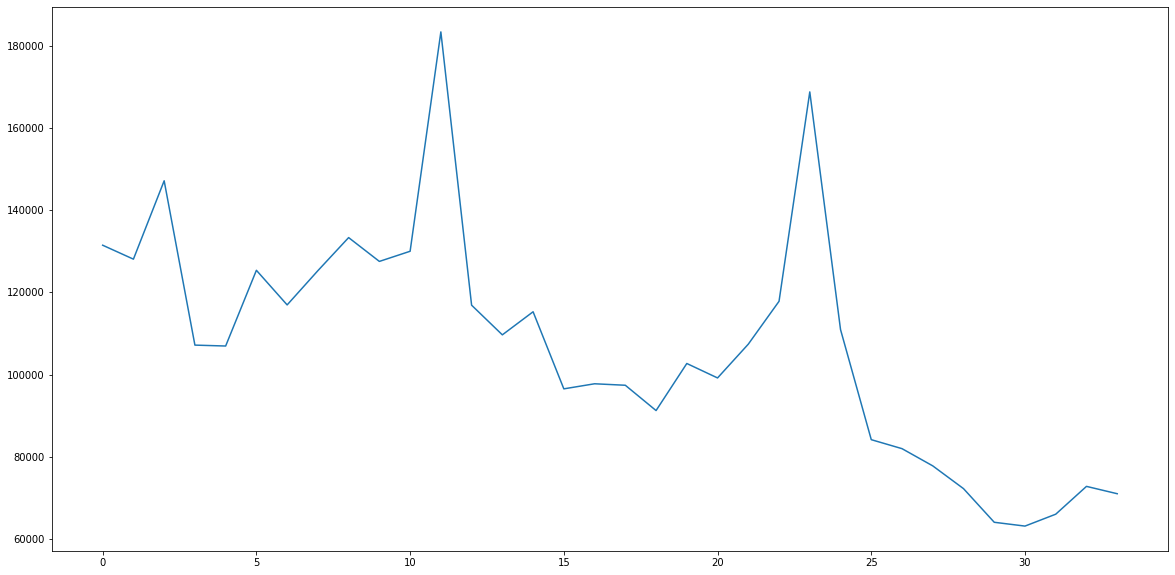

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.plot(monthly_sales)
plt.show()

## Monthly total sales ##

In [18]:
monthly_sales_amount = data.groupby('date_block_num')['item_price'].sum()
monthly_sales_amount.head()

date_block_num
0    8.221172e+07
1    7.558019e+07
2    8.429831e+07
3    6.151282e+07
4    5.727413e+07
Name: item_price, dtype: float64

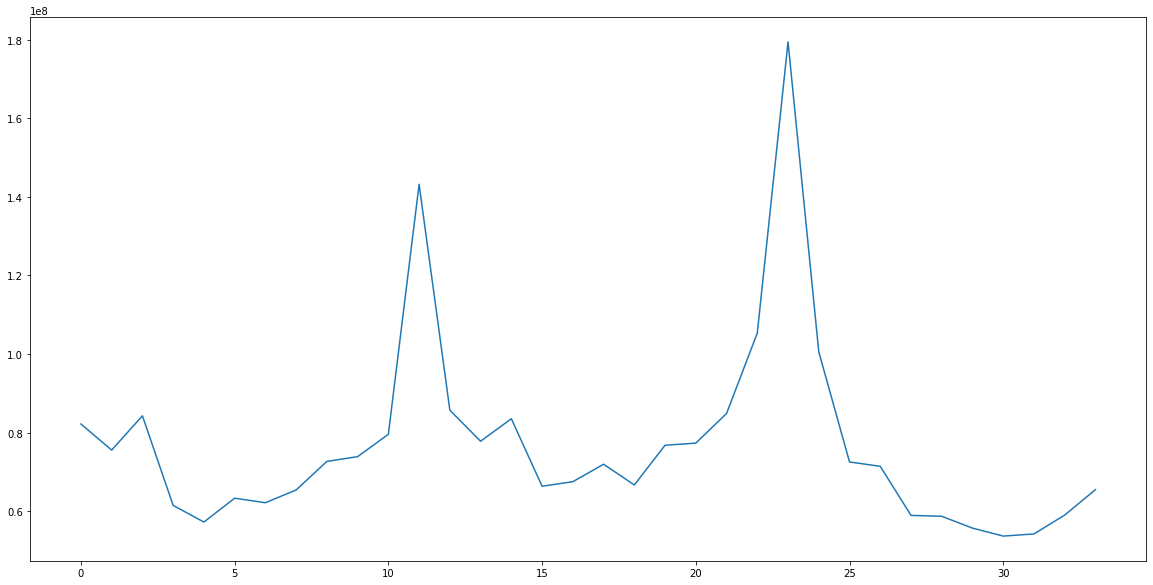

In [19]:
plt.figure(figsize=(20,10))
plt.plot(monthly_sales_amount)
plt.show()

## Understanding data distribution ##

In [20]:
data.describe()

,date_block_num,item_price,item_cnt_day
count,2.935843e+06,2.935843e+06,2.935843e+06
mean,1.456991e+01,8.908535e+02,1.242641e+00
std,9.422992e+00,1.729801e+03,2.618837e+00
min,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.990000e+02,1.000000e+00
75%,2.300000e+01,9.990000e+02,1.000000e+00
max,3.300000e+01,3.079800e+05,2.169000e+03


* **date-block_num** :- high std can be explained by it's categorical nature.
* **item_price** :- high std can be explained by large difference between min and max.
* **item_cnt_day** :- high std can be explained by large difference between min and max.

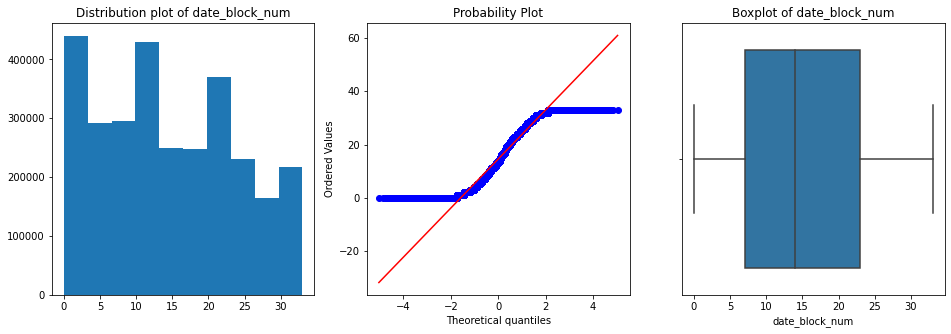

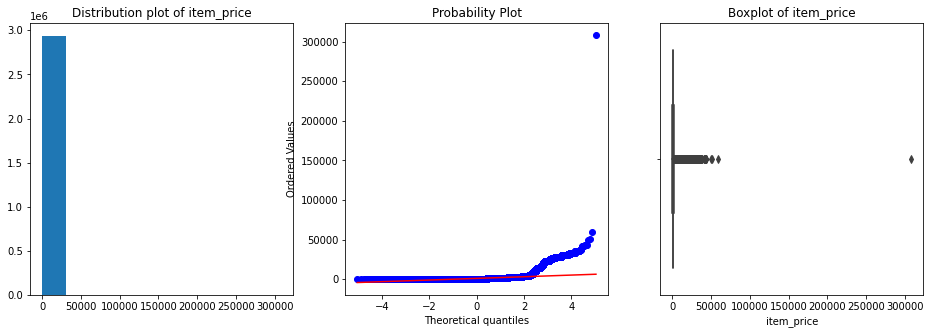

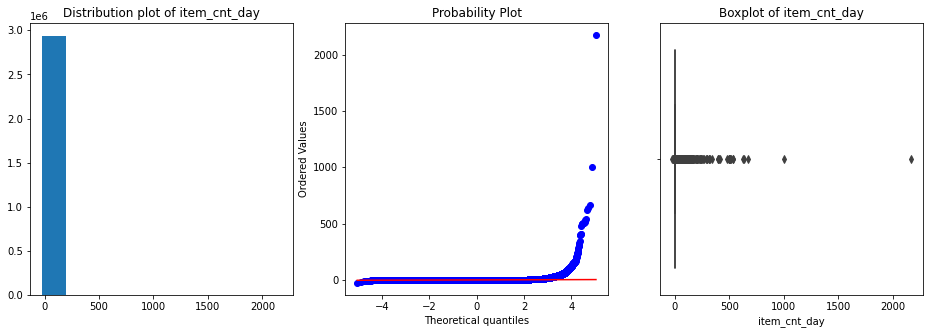

In [21]:
from scipy import stats
import seaborn as sns

def plots(df, column_name):
    plt.figure(figsize=(16,5))
    
    plt.subplot(1,3,1)
    plt.hist(df[column_name])
    plt.title(f'Distribution plot of {column_name}')
    
    plt.subplot(1,3,2)
    plt.title(f'Probablity plot of {column_name}')
    stats.probplot(df[column_name], dist='norm', plot=plt)
    
    plt.subplot(1,3,3)
    plt.title(f'Boxplot of {column_name}')
    sns.boxplot(x=df[column_name])
    plt.show()

columns_of_interest = ['date_block_num', 'item_price', 'item_cnt_day']
for column in columns_of_interest:
    plots(data, column)

> **item_price** and **item_cnt_day** has a lot of outliers

## Busiest shops ##

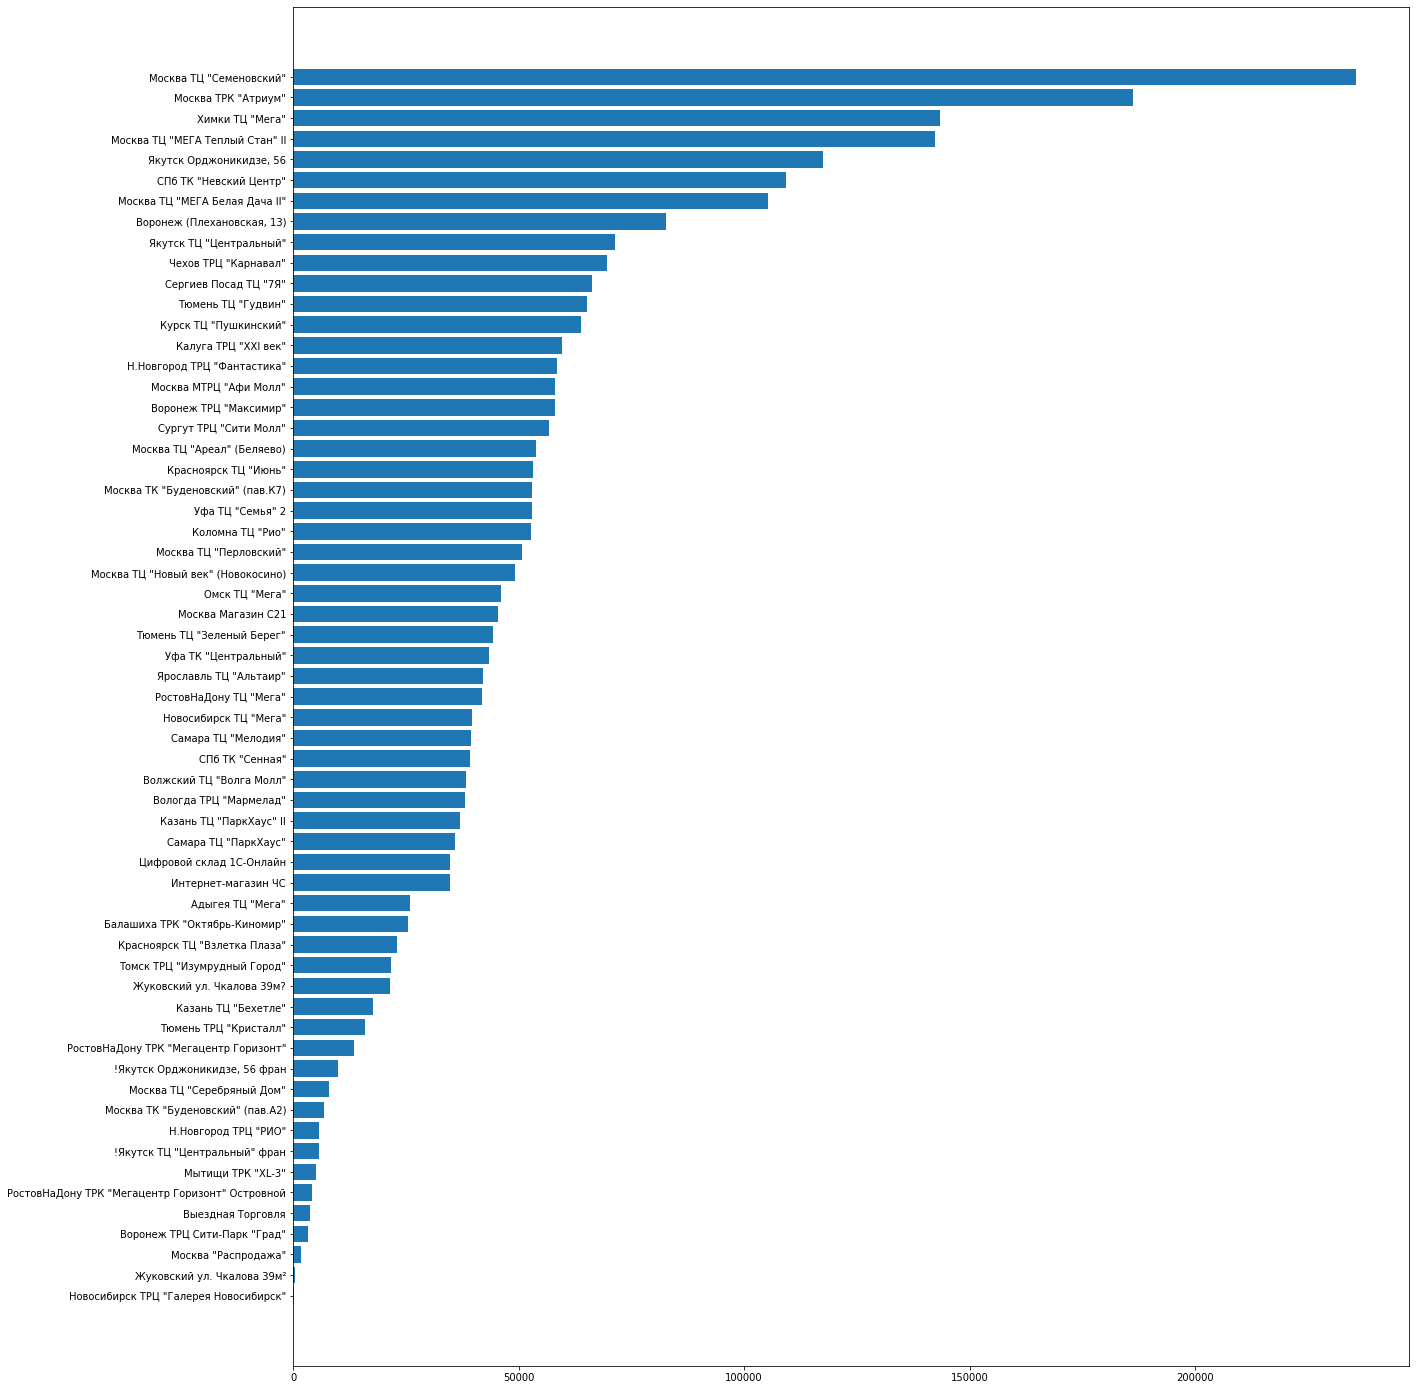

In [22]:
busy_shops_ranking = data.groupby('shop_name')['shop_name'].size().sort_values()
plt.figure(figsize=(20,25))
plt.barh(busy_shops_ranking.index, busy_shops_ranking)
plt.show()

## Shops with highest earning ##

### Creating total amount column ###

In [23]:
data['total_amount'] = data['item_price'] * data['item_cnt_day']
data.head()

,date,date_block_num,item_price,item_cnt_day,item_name,item_category_name,shop_name,total_amount
0,2013-02-01,0,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",999.00
1,2013-03-01,0,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум""",899.00
2,2013-05-01,0,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,Музыка - Винил,"Москва ТРК ""Атриум""",-899.00
3,2013-06-01,0,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил,"Москва ТРК ""Атриум""",1709.05
4,2013-01-15,0,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",1099.00


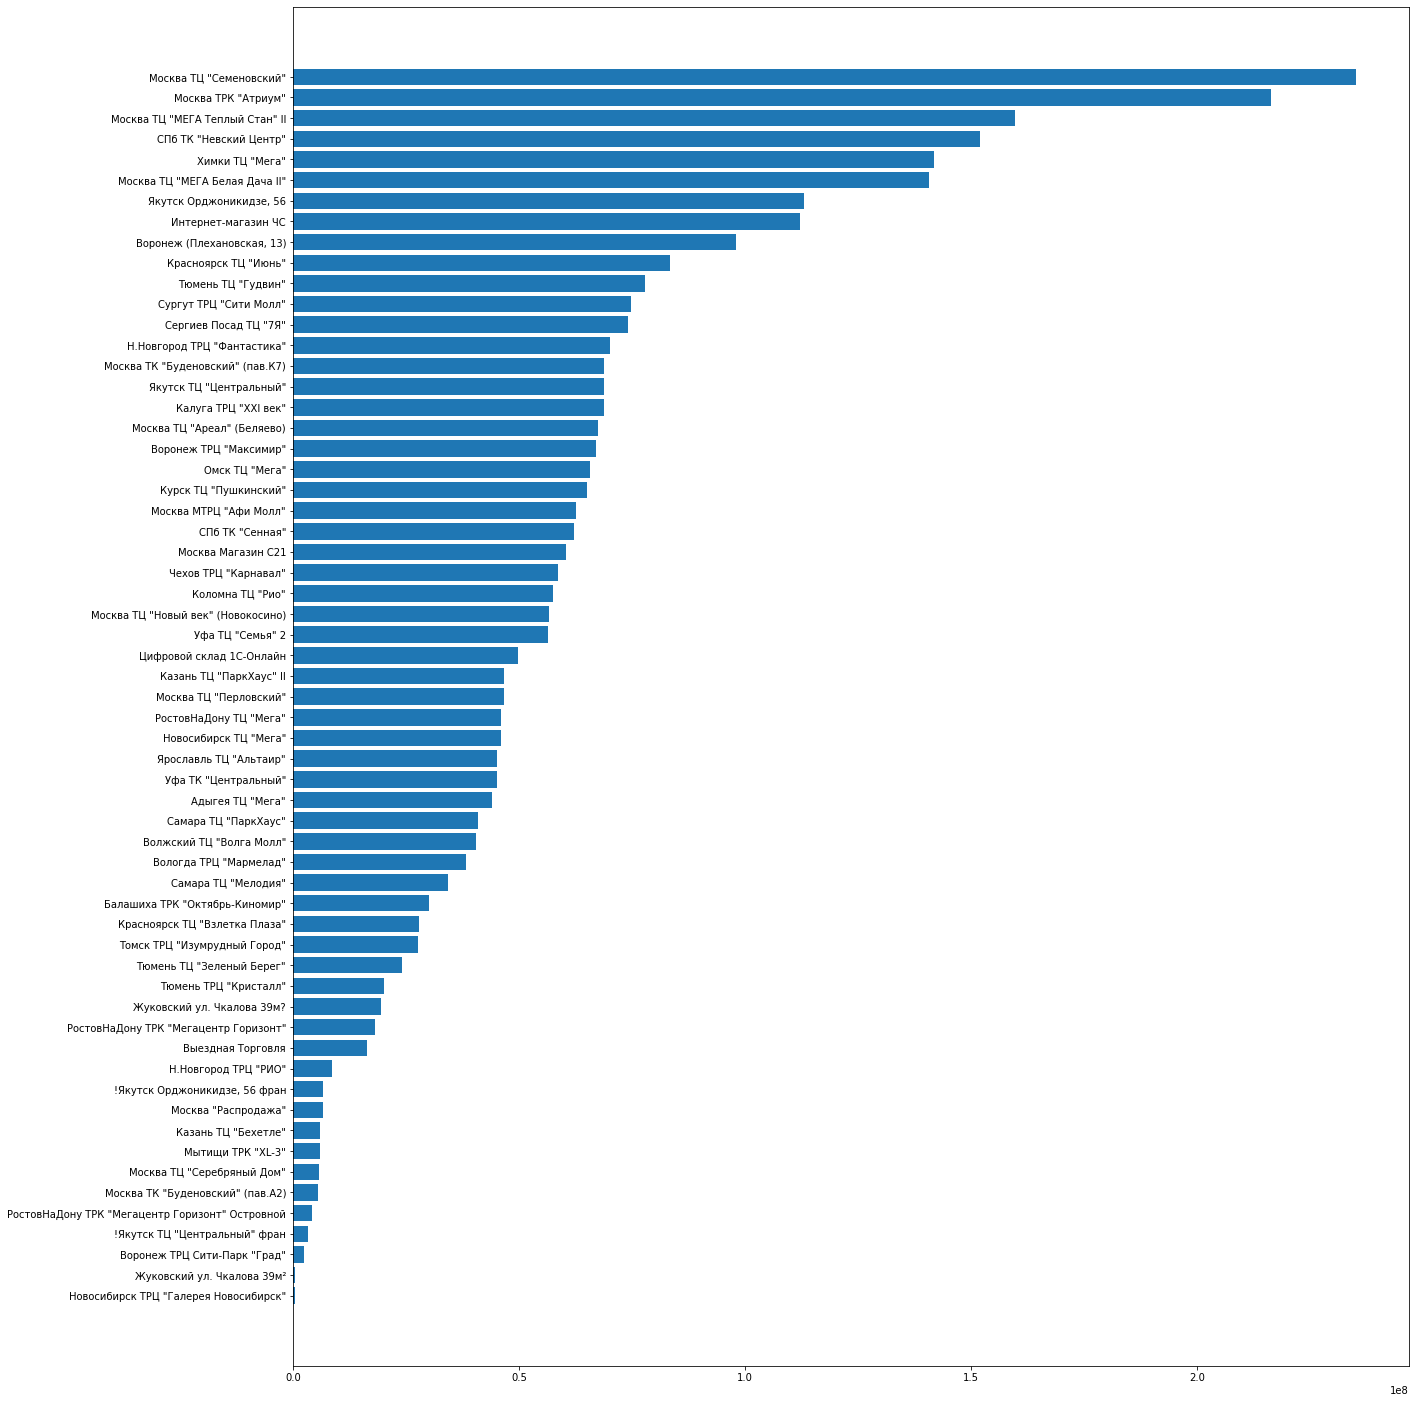

In [24]:
shops_earning_ranking = data.groupby('shop_name')['total_amount'].sum().sort_values()
plt.figure(figsize=(20,25))
plt.barh(shops_earning_ranking.index, shops_earning_ranking)
plt.show()

## Top 10 items sold ##

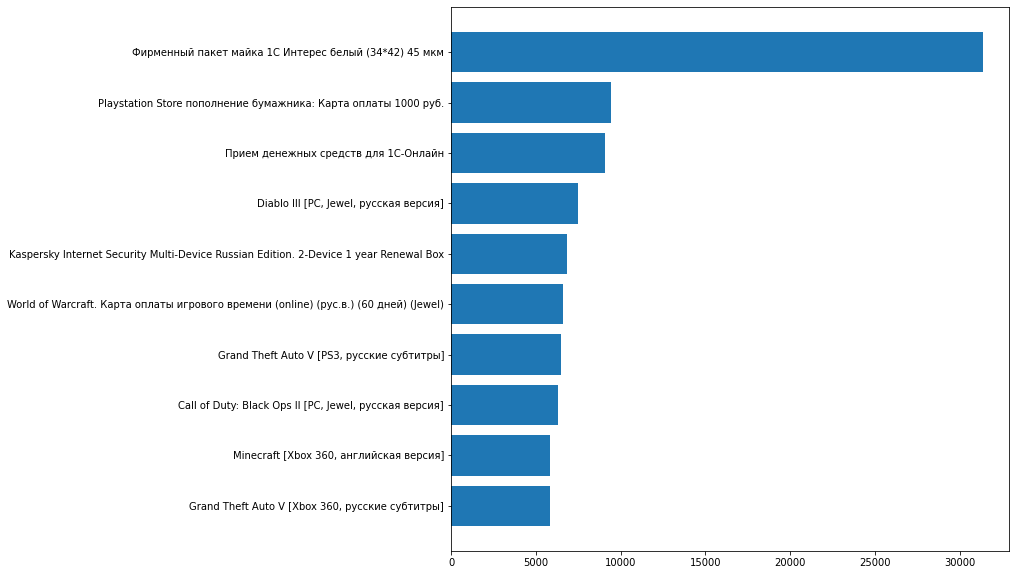

In [25]:
top_10_items = data.groupby('item_name').size().sort_values()[-10:]
plt.figure(figsize=(10,10))
plt.barh(top_10_items.index, top_10_items)
plt.show()

## Categories of items sold with highest sales ##

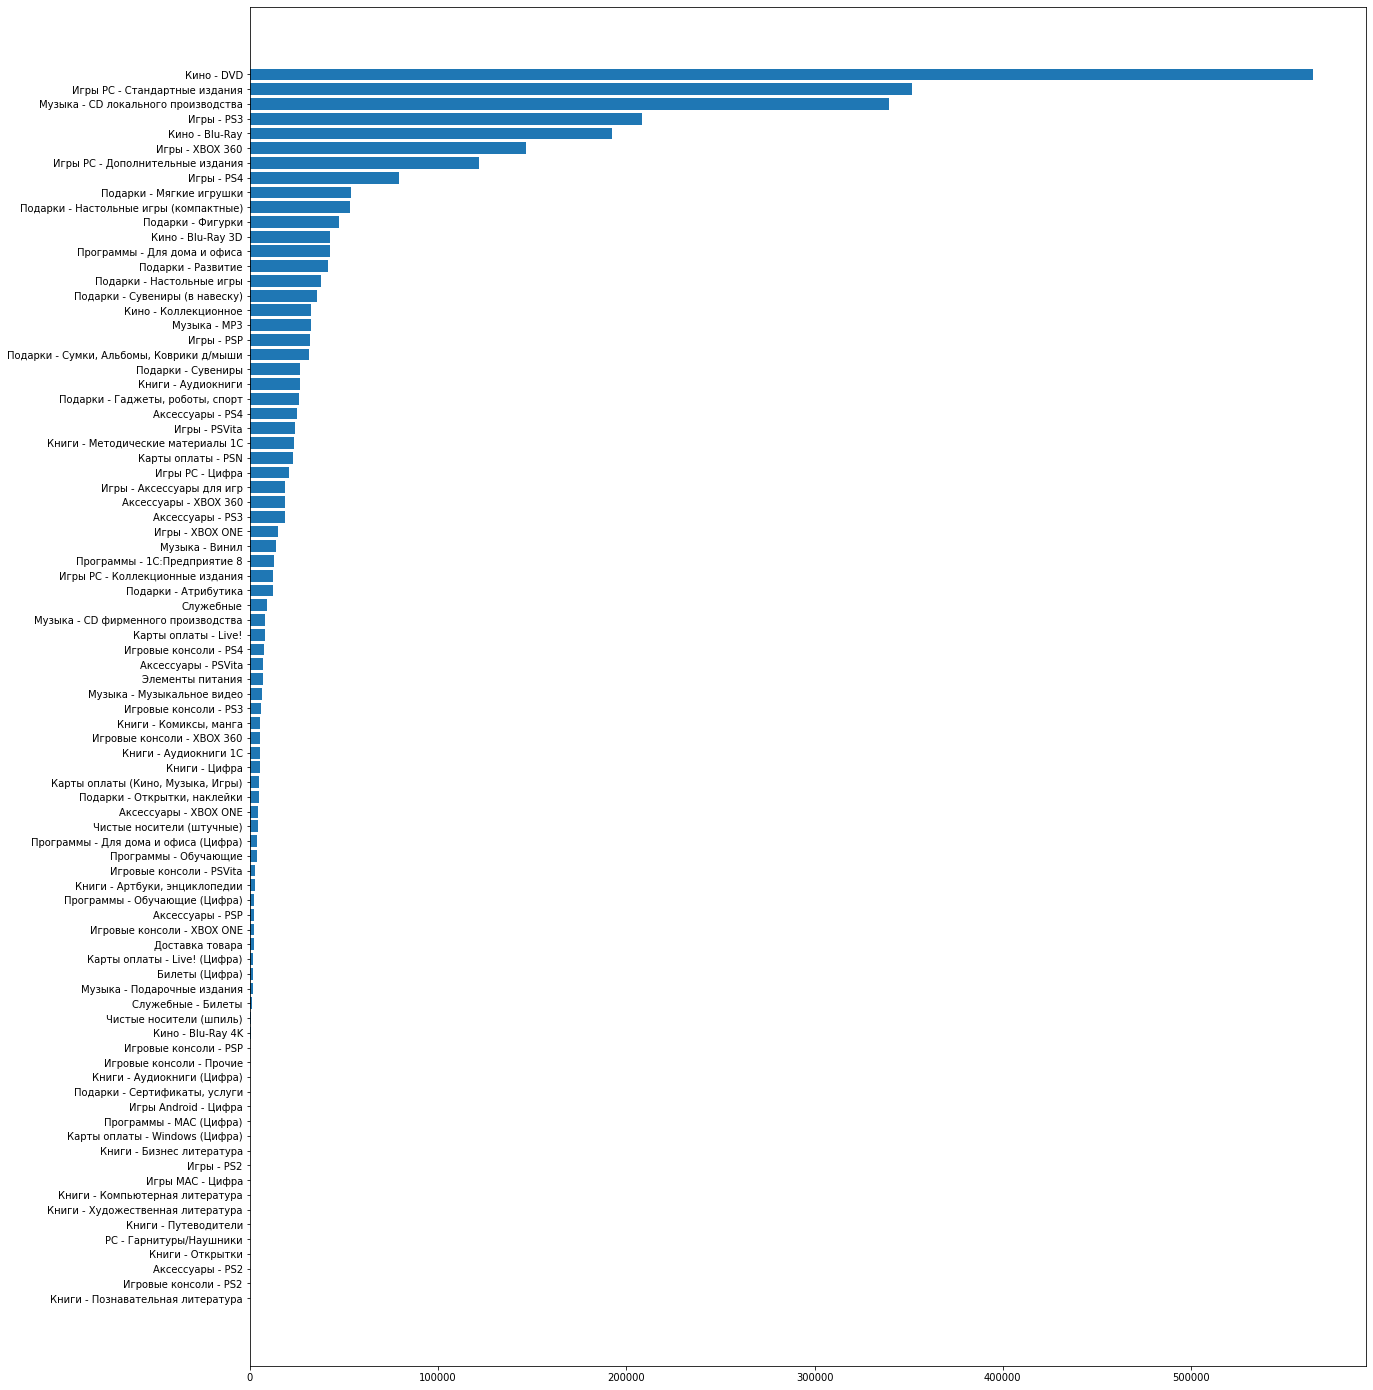

In [26]:
top_10_categories = data.groupby('item_category_name').size().sort_values()
plt.figure(figsize=(20,25))
plt.barh(top_10_categories.index, top_10_categories)
plt.show()

# Data Wrangling #

In [27]:
# Eliminate outliers by droping data with standard deviation higher than 3 
sales_train.drop(sales_train[sales_train.item_price > 3 * sales_train.item_price.std()].index, inplace = True)
sales_train.drop(sales_train[sales_train.item_cnt_day > 3 * sales_train.item_cnt_day.std()].index, inplace = True)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [28]:
# Eliminate negative values
sales_train.drop(sales_train[sales_train.item_price < 0].index, inplace = True)
sales_train.drop(sales_train[sales_train.item_cnt_day < 0].index, inplace = True)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0


In [29]:
# Group data based on shop id and item id then get value of sales per month
pivot_train = sales_train.pivot_table(index=['shop_id', 'item_id'], columns='date_block_num', values='item_cnt_day', aggfunc='sum').fillna(0.0)
pivot_train.head()

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [30]:
train_df = pivot_train.reset_index()
train_df["shop_id"] = train_df.shop_id.astype("str")
train_df["item_id"] = train_df.item_id.astype("str")
train_df.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Merge the items with categories
item_cat_df = items.merge(item_categories[['item_category_id','item_category_name']], how="inner", on="item_category_id")[['item_id','item_category_name']]
item_cat_df['item_id'] = item_cat_df.item_id.astype('str')
# Merge the train dataframe with the items and categories dataframe
train_df = train_df.merge(item_cat_df, how="inner", on="item_id")
# Perform Label encoding
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
# Check the variables in the train dataframe
train_df

,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_name
0,0,30,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
1,1,30,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
2,2,30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
3,3,30,0.0,4.0,5.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Кино - DVD
4,4,30,0.0,7.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - DVD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418098,59,9760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - Blu-Ray
418099,59,12846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Кино - Blu-Ray
418100,59,16270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Программы - Для дома и офиса
418101,59,17732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Игры PC - Дополнительные издания


In [32]:
# Encode the column with categorical data
train_df['item_category_name'] = number.fit_transform(train_df['item_category_name'])
# Rearrange the columns
train_df = train_df[['shop_id', 'item_id', 'item_category_name'] + list(range(34))]
train_df.head()

,shop_id,item_id,item_category_name,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,30,40,0.0,22.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,30,40,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,30,40,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,30,40,0.0,4.0,5.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,30,40,0.0,7.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training #

In [33]:
# Parametilisations
param = {'max_depth': 13, 
         'subsample':1,
         'min_child_weight': 0.7,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse',
         'n_estimators': 120}

# Generate a DMatrix to train the model
import xgboost as xgb
xgbtrain = xgb.DMatrix(train_df.iloc[:,  (train_df.columns != 33)].values, train_df.iloc[:, train_df.columns == 33].values)
watchlist  = [(xgbtrain,'train-rmse')]

# Train the model
bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(train_df.iloc[:,  (train_df.columns != 33)].values))
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(preds,train_df.iloc[:, train_df.columns == 33].values))

# Print the RMSE of the model
print(rmse)

[13:54:15] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimators", "num_round", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.4748729271636082


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

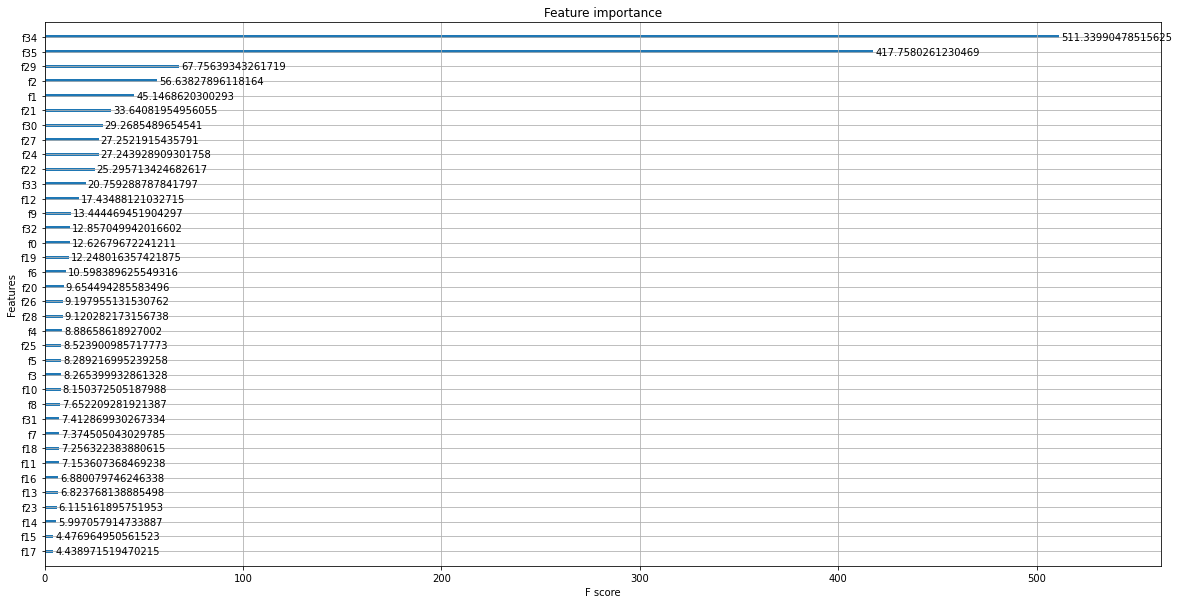

In [34]:
# See the the most important features
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(bst, ax = ax, importance_type='gain')

In [35]:
# Preparing the test data frame
test_df = test
test_df.shop_id = test_df.shop_id.astype('str')
test_df.item_id = test_df.item_id.astype('str')
test_df = test.merge(train_df, how="left", on=["shop_id", "item_id"]).fillna(0.0)
# Check the first five variables of the test dataframe
test_df.head()

,ID,shop_id,item_id,item_category_name,0,1,2,3,4,5,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
d = dict(zip(test_df.columns[4:],list(np.array(list(test_df.columns[4:])) - 1)))

test_df = test_df.rename(d, axis = 1)
# Make sales predictions for the test data
predictions = bst.predict(xgb.DMatrix(test_df.iloc[:, (test_df.columns != 'ID') & (test_df.columns != -1)].values))
predictions = list(map(lambda x: min(20, max(x,0)), list(predictions)))
submission = pd.DataFrame({'ID': test_df.ID, 'item_cnt_month': predictions})
submission.head()

,ID,item_cnt_month
0,0,0.391735
1,1,0.116368
2,2,0.547286
3,3,0.159564
4,4,0.116368


In [37]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
